# 차량 연비 예측

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/Heez27/AICE_Associate/main/csv/auto_mpg.xlsx'
mpg_df = pd.read_excel(url)
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1,ford torino


# 문제3. 영어로 된 컬럼명을 한글로 변경

In [ ]:
mpg_df.rename(columns={"mpg": "연비", "cylinders":"실린더 수",	"displacement":"배기량",	"horsepower":"마력",	"weight":"차량 무게",	"acceleration":"가속 성능",	"model_year":"차량 출시 연도",	"origin":"제조 국가 코드","name":"차량 이름"}, inplace=True)

In [ ]:
mpg_df.head()

,연비,실린더 수,배기량,마력,차량 무게,가속 성능,차량 출시 연도,제조 국가 코드,차량 이름
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1,ford torino


# 문제4. 결측치 있는 행 지우기

In [ ]:
mpg_df.isnull().sum()

,0
연비,17
실린더 수,2
배기량,6
마력,7
차량 무게,8
가속 성능,6
차량 출시 연도,2
제조 국가 코드,0
차량 이름,0


In [ ]:
del_df = mpg_df.dropna()

# 문제5. 이상치 제거하기

<Axes: xlabel='마력', ylabel='연비'>

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 

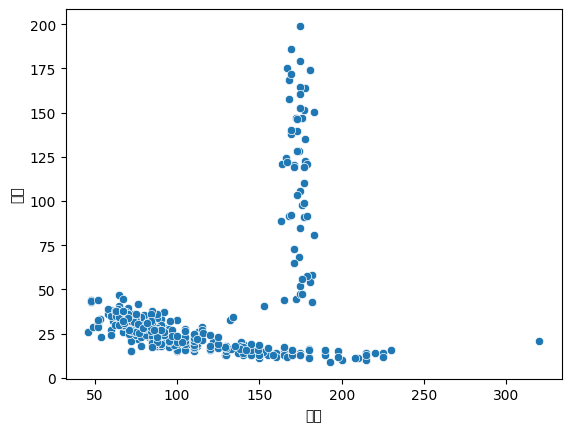

In [ ]:
sns.scatterplot(data=del_df, x="마력", y="연비")

In [ ]:
del_df.drop(del_df[(del_df['마력']>=150) & (del_df['연비']>50)].index, inplace=True)
del_df.head()

/tmp/ipython-input-2869559832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del_df.drop(del_df[(del_df['마력']>=150) & (del_df['연비']>50)].index, inplace=True)


,연비,실린더 수,배기량,마력,차량 무게,가속 성능,차량 출시 연도,제조 국가 코드,차량 이름
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1,ford torino


# 문제6. 연속형 변수들 간의 관계 파악

In [ ]:
col_list = ['배기량', '마력', '차량 무게', '가속 성능']

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/us

<Axes: >

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) m

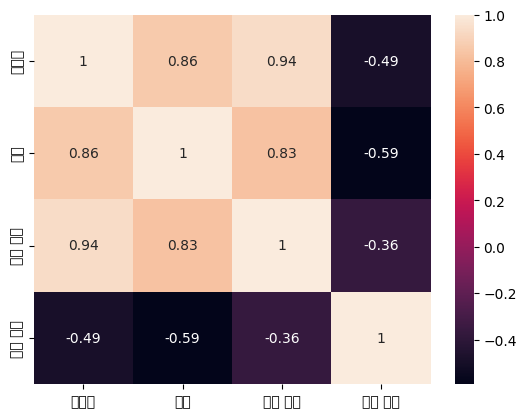

In [ ]:
sns.heatmap(del_df[col_list].corr(), annot=True)

# 문제7. 예측 모델 성능 높이기 위해 불필요한 변수 제거

In [ ]:
clear_df = del_df.drop(['차량 무게', '차량 출시 연도',	'제조 국가 코드', '차량 이름'],axis=1)
clear_df

,연비,실린더 수,배기량,마력,가속 성능
0,18.00,8.0,307.0,130.0,12.0
1,15.00,8.0,350.0,165.0,11.5
2,18.00,8.0,318.0,150.0,11.0
3,16.00,8.0,304.0,150.0,12.0
4,17.00,8.0,302.0,140.0,10.5
...,...,...,...,...,...
429,43.88,4.0,380.0,165.0,20.1
451,44.78,8.0,376.0,172.0,19.9
460,42.88,4.0,394.0,182.0,20.1
463,47.21,4.0,386.0,175.0,20.5


# 문제8. 원-핫 인코딩

In [ ]:
encoding_df = pd.get_dummies(data = clear_df, columns = ['실린더 수'], drop_first=True)
encoding_df

,연비,배기량,마력,가속 성능,실린더 수_4.0,실린더 수_5.0,실린더 수_6.0,실린더 수_8.0
0,18.00,307.0,130.0,12.0,False,False,False,True
1,15.00,350.0,165.0,11.5,False,False,False,True
2,18.00,318.0,150.0,11.0,False,False,False,True
3,16.00,304.0,150.0,12.0,False,False,False,True
4,17.00,302.0,140.0,10.5,False,False,False,True
...,...,...,...,...,...,...,...,...
429,43.88,380.0,165.0,20.1,True,False,False,False
451,44.78,376.0,172.0,19.9,False,False,False,True
460,42.88,394.0,182.0,20.1,True,False,False,False
463,47.21,386.0,175.0,20.5,True,False,False,False


# 문제9. train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
Feature = encoding_df.drop(['연비'], axis=1)
Target = encoding_df['연비']
X_train, X_valid, y_train, y_valid = train_test_split(Feature, Target, test_size=0.2, random_state=42)

# 문제10. Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_valid)

# 문제11. 서포트 벡터 머신(SVM)회귀 모델

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svr.fit(X_train, y_train)

SVR(epsilon=0.2)

# 문제12. RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=7, random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=7, n_estimators=200,
                      random_state=42)

# 문제 13. 딥러닝 모델

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
tf.random.set_seed(42)

In [ ]:
model = Sequential()
model.add(Dense(32, activation="tanh", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(24, activation="tanh"))
model.add(Dropout(0.3))
model.add(Dense(16, activation="tanh"))
model.add(Dense(8, activation="tanh"))
model.add(Dense(1, activation="linear"))

model.compile(optimizer='rmsprop',
              loss='mean_absolute_error',
              metrics=['mean_squared_error'])

model.fit(X_train, y_train,batch_size=8, epochs=50, validation_data=(X_test, y_valid))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 23.5965 - mean_squared_error: 623.6655 - val_loss: 22.3610 - val_mean_squared_error: 560.1534
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.3759 - mean_squared_error: 563.3640 - val_loss: 20.6491 - val_mean_squared_error: 492.0543
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 20.9144 - mean_squared_error: 502.3171 - val_loss: 19.5908 - val_mean_squared_error: 451.2691
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.8827 - mean_squared_error: 462.4349 - val_loss: 18.9951 - val_mean_squared_error: 428.4208
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.2516 - mean_squared_error: 439.1662 - val_loss: 18.5431 - val_mean_squared_error: 411.4438
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.7940 - mean_squared_error: 421.7684 - val_loss: 18.1448 - val_mean_squared_error: 396.8125
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.3923 - mean_squared_error:

# 문제 14. 딥러닝 모델에 새로운 데이터 입력 후 예측

In [ ]:
simul_data = np.array([[200.0, 95.0, 15.0, 1, 0, 0, 0]])

In [ ]:
deep_pre = model.predict(scaler.transform(simul_data))
deep_pre

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[19.888256]], dtype=float32)